# E5 Advanced geospatial plotting

In [15]:
import pandas as pd
import os
from keplergl import KeplerGl
from pyproj import CRS
import numpy as np
from matplotlib import pyplot as plt

In [2]:
!pip install keplergl

  Using cached keplergl-0.3.7-py2.py3-none-any.whl
  Using cached ipywidgets-8.1.7-py3-none-any.whl.metadata (2.4 kB)
  Using cached traittypes-0.2.1-py2.py3-none-any.whl.metadata (1.0 kB)
  Using cached geopandas-1.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached shapely-2.1.1-cp312-cp312-win_amd64.whl.metadata (7.0 kB)
  Using cached jupyter_packaging-0.12.3-py3-none-any.whl.metadata (7.7 kB)
  Using cached geoarrow_pyarrow-0.2.0-py3-none-any.whl.metadata (628 bytes)
  Using cached geoarrow_pandas-0.1.1-py3-none-any.whl.metadata (493 bytes)
  Using cached geoarrow_types-0.3.0-py3-none-any.whl.metadata (409 bytes)
  Using cached geoarrow_c-0.3.0-cp312-cp312-win_amd64.whl.metadata (2.5 kB)
  Using cached pyproj-3.7.1-cp312-cp312-win_amd64.whl.metadata (31 kB)
  Using cached widgetsnbextension-4.0.14-py3-none-any.whl.metadata (1.6 kB)
  Using cached jupyterlab_widgets-3.0.15-py3-none-any.whl.metadata (20 kB)
  Using cached deprecation-2.1.0-py2.py3-none-any.whl.metadata (4.6 kB)
  

In [4]:
from keplergl import KeplerGl

In [7]:
df = pd.read_csv(r'C:\Users\hp\Documents\.ipynb_checkpoints\nyc_data.csv', index_col=0, low_memory=False)

In [8]:
df.columns

Index(['ride_id_x', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'date', 'avg_temp', 'value', 'month', 'ride_id_y',
       'merge_flag', 'day_of_week'],
      dtype='object')

In [9]:
df.dtypes

ride_id_x              object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
date                   object
avg_temp              float64
value                   int64
month                  object
ride_id_y               int64
merge_flag             object
day_of_week            object
dtype: object

## Data preprocessing

In [10]:
# Create a value column and group by start and end station 

df['value'] = 1
df_group = df.groupby(['start_station_name', 'end_station_name'])['value'].count().reset_index()

In [11]:
df_group

,start_station_name,end_station_name,value
0,1 Ave & E 110 St,1 Ave & E 110 St,27
1,1 Ave & E 110 St,1 Ave & E 44 St,2
2,1 Ave & E 110 St,1 Ave & E 68 St,1
3,1 Ave & E 110 St,1 Ave & E 78 St,3
4,1 Ave & E 110 St,1 Ave & E 94 St,15
...,...,...,...
213962,Yankee Ferry Terminal,Picnic Point,16
213963,Yankee Ferry Terminal,Soissons Landing,19
213964,Yankee Ferry Terminal,South St & Gouverneur Ln,1
213965,Yankee Ferry Terminal,South St & Whitehall St,5


In [12]:
print(df_group['value'].sum())
print(df.shape)

1038922
(1048575, 20)


In [13]:
df_group['value'].describe()

count    213967.000000
mean          4.855524
std           8.717535
min           1.000000
25%           1.000000
50%           2.000000
75%           5.000000
max         428.000000
Name: value, dtype: float64

## Some exploratory analysis

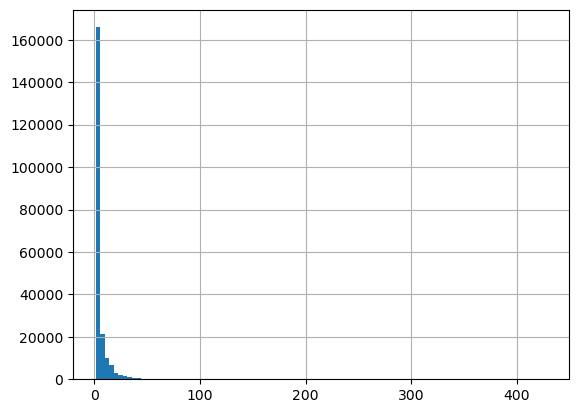

In [16]:
df_group['value'].hist(bins = 100)
plt.show()

[]

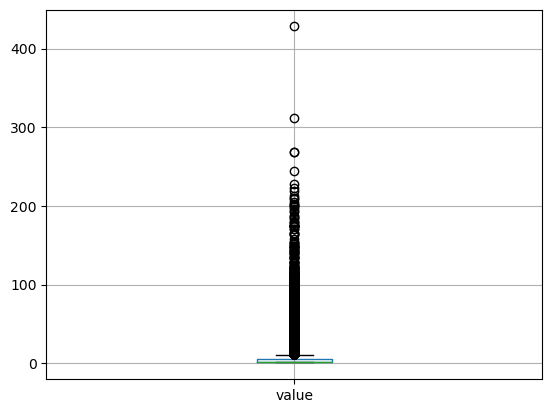

In [17]:
b_plot = df_group.boxplot(column = 'value') 
b_plot.plot()

In [18]:
df_group['value'].sort_index().value_counts()

value
1      88068
2      35464
3      19735
4      13026
5       9606
       ...  
118        1
145        1
178        1
228        1
209        1
Name: count, Length: 176, dtype: int64

In [19]:
df_group.to_csv('df_groupby_final.csv')

In [20]:
df_group.head()

,start_station_name,end_station_name,value
0,1 Ave & E 110 St,1 Ave & E 110 St,27
1,1 Ave & E 110 St,1 Ave & E 44 St,2
2,1 Ave & E 110 St,1 Ave & E 68 St,1
3,1 Ave & E 110 St,1 Ave & E 78 St,3
4,1 Ave & E 110 St,1 Ave & E 94 St,15


In [21]:
df_group.rename(columns = {'from_station_name':'start_station_name','to_station_name' : 'end_station_name',
                          'value': 'trips'}, inplace = True)

## Merge data

In [58]:
# Create a unique dataframe with station names and their coordinates
start_coords = df[['start_station_name', 'start_lat', 'start_lng']].drop_duplicates()
end_coords = df[['end_station_name', 'end_lat', 'end_lng']].drop_duplicates()

In [59]:
# Rename for merge
start_coords.columns = ['start_station_name', 'lat', 'lon']
end_coords.columns = ['end_station_name', 'end_lat', 'end_lng']

In [60]:
# Merge coordinates into your grouped data
df_group = df_group.merge(start_coords, on='start_station_name', how='left')
df_group = df_group.merge(end_coords, on='end_station_name', how='left')

## Initializing the Map

In [61]:
map_1 = KeplerGl(height=700, data={"NYC Trip Data": df_group})

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


In [62]:
map_1

KeplerGl(data={'NYC Trip Data':            start_station_name         end_station_name  trips        lat  \
0 …

#### 1. **Point Layer** for Station Locations:
   - Color: Blue (#1f78b4) to stand out against the dark map.
   - Radius: Increased for visibility.
   - Location: Mapped using start_lat and start_lng.

2. **Arc Layer** for Visualizing Trips:
   - Arcs connect start and end stations.
   - Thickness is based on the number of trips (value column).
   - Gradient from blue to orange indicates trip volume.

These visual settings helped emphasize both **trip intensity** and **station density**, improving the readability and storytelling of the map.

## Analysis

#### Filter and Analysis of NYC Trip Map

After applying a filter on the value column to only show high-frequency trips, several key patterns emerged:

- The busiest bike trips were concentrated in areas like Midtown Manhattan, Lower Manhattan, and parts of Brooklyn.
- High-density arcs were seen between major hubs like Central Park, Penn Station, and the Brooklyn Bridge.
- These zones correspond with both commuter traffic and tourist hotspots.

Based on additional research, areas like Midtown have:
- High office density
- Subway transfer hubs
- Popular tourist spots

This explains the heavy use of bikes in these locations, especially during commuting hours and weekends.

In [64]:
# Export the current map's configuration
config = map_1.config

In [65]:
config

{'version': 'v1',
 'config': {'visState': {'filters': [{'dataId': ['NYC Trip Data'],
     'id': 'wzk9phedj',
     'name': ['trips'],
     'type': 'range',
     'value': [52.29, 99],
     'plotType': 'histogram',
     'animationWindow': 'free',
     'yAxis': None,
     'view': 'side',
     'speed': 1,
     'enabled': True}],
   'layers': [{'id': 'ywmmn9',
     'type': 'point',
     'config': {'dataId': 'NYC Trip Data',
      'label': 'start',
      'color': [136, 87, 44],
      'highlightColor': [252, 242, 26, 255],
      'columns': {'lat': 'lat', 'lng': 'lon'},
      'isVisible': True,
      'visConfig': {'radius': 10,
       'fixedRadius': False,
       'opacity': 0.8,
       'outline': False,
       'thickness': 2,
       'strokeColor': None,
       'colorRange': {'name': 'Global Warming',
        'type': 'sequential',
        'category': 'Uber',
        'colors': ['#5A1846',
         '#900C3F',
         '#C70039',
         '#E3611C',
         '#F1920E',
         '#FFC300']},
       

In [ ]:
import json
with open("config.json", "w") as outfile:
    json.dump(config, outfile)

In [ ]:
m.save_to_html(file_name='CitiBike_Aggregated_Trips_Map.html', read_only=False)